#MNIST CNN

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.datasets import mnist
(train_data, y_train), (test_data, y_test) = mnist.load_data()

In [ ]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10) #轉為one hot
y_test = to_categorical(y_test, num_classes=10) #轉為one hot

In [ ]:
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(1, 1),  padding='valid', activation='relu', input_shape=(28, 28, 1),name='Conv1'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),name='Pool1'))
model.add(BatchNormalization(name='Norn1'))

model.add(Conv2D(256, (5, 5), strides=(1, 1),  padding='same', activation='relu',name='Conv2'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),name='Pool2'))
model.add(BatchNormalization(name='Norn2'))
model.add(Conv2D(384, (3, 3), strides=(1, 1),  padding='same', activation='relu',name='Conv3'))
model.add(Conv2D(384, (3, 3), strides=(1, 1),  padding='same', activation='relu',name='Conv4'))
model.add(Conv2D(256, (3, 3), strides=(1, 1),  padding='same', activation='relu',name='Conv5'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),name='Pool3'))

model.add(Flatten())
model.add(Dense(4096, activation='relu',name='FC4'))
model.add(Dropout(0.8))
model.add(Dense(1000, activation='relu',name='FC5'))
model.add(Dropout(0.8))
model.add(Dense(10, activation='softmax',name='FC6'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 28, 28, 96)        11712     
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 13, 13, 96)        0         
_________________________________________________________________
Norn1 (BatchNormalization)   (None, 13, 13, 96)        384       
_________________________________________________________________
Conv2 (Conv2D)               (None, 13, 13, 256)       614656    
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 6, 6, 256)         0         
_________________________________________________________________
Norn2 (BatchNormalization)   (None, 6, 6, 256)         1024      
_________________________________________________________________
Conv3 (Conv2D)               (None, 6, 6, 384)        

In [ ]:
model.compile(optimizer='adam',
      loss='categorical_crossentropy',
      metrics=["accuracy"])

history = model.fit(
    train_data,
    y_train,
    batch_size=64,
    validation_split=0.3,
    epochs=10)

Epoch 1/30
657/657 [==============================] - 16s 24ms/step - loss: 0.2031 - accuracy: 0.9561 - val_loss: 0.4054 - val_accuracy: 0.8939
Epoch 2/30
657/657 [==============================] - 15s 23ms/step - loss: 0.1556 - accuracy: 0.9675 - val_loss: 0.1408 - val_accuracy: 0.9693
Epoch 3/30
657/657 [==============================] - 15s 23ms/step - loss: 0.1089 - accuracy: 0.9772 - val_loss: 0.0898 - val_accuracy: 0.9843
Epoch 4/30
657/657 [==============================] - 15s 23ms/step - loss: 0.1119 - accuracy: 0.9793 - val_loss: 0.0947 - val_accuracy: 0.9840
Epoch 5/30
657/657 [==============================] - 15s 23ms/step - loss: 0.1035 - accuracy: 0.9799 - val_loss: 0.0874 - val_accuracy: 0.9833
Epoch 6/30
657/657 [==============================] - 15s 23ms/step - loss: 0.0612 - accuracy: 0.9870 - val_loss: 0.1016 - val_accuracy: 0.9811
Epoch 7/30
657/657 [==============================] - 15s 23ms/step - loss: 0.0798 - accuracy: 0.9842 - val_loss: 0.1417 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


In [ ]:
model.evaluate(test_data,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1068 - accuracy: 0.9851


[0.10678515583276749, 0.9850999712944031]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
predictions = model.predict(test_data)
test_label=np.argmax(y_test, axis=1)
print(classification_report(test_label, np.argmax(predictions, axis=1))) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       1.00      0.98      0.99       892
           6       0.99      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#resize project

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.datasets import mnist
(x_train, train_label), (x_test, test_label) = mnist.load_data()

In [ ]:
import cv2
train_data = []
for img in x_train:
  resized_img = cv2.resize(img, (227, 227))
  train_data.append(resized_img)
test_data = []
for img in x_test:
  resized_img = cv2.resize(img, (227, 227))
  test_data.append(resized_img)

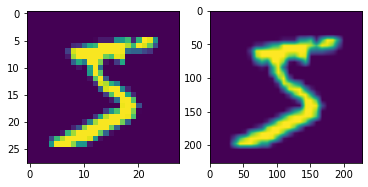

In [ ]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(x_train[0])
axarr[1].imshow(train_data[0])

In [ ]:
train_data=np.array(train_data)
test_data=np.array(test_data)
train_data = train_data.reshape(train_data.shape[0], 227, 227, 1)
test_data = test_data.reshape(test_data.shape[0], 227, 227, 1)
train_label = to_categorical(train_label, num_classes=10)
test_label = to_categorical(test_label, num_classes=10)

In [ ]:
model = Sequential()

model.add(Conv2D(96, (11, 11),strides=(4,4),padding='valid', activation='relu', input_shape=(227, 227,1),name='Conv1'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),name='Pool1'))
model.add(BatchNormalization(name='Norn1'))

model.add(Conv2D(256, (5, 5),strides=(1,1),padding='same', activation='relu',name='Conv2'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),name='Pool2'))
model.add(BatchNormalization(name='Norn2'))

model.add(Conv2D(384, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv3'))
model.add(Conv2D(384, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv4'))
model.add(Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),name='Pool3'))

model.add(Flatten())
model.add(Dense(4096, activation='relu',name='FC4'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu',name='FC5'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax',name='FC6'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 55, 55, 96)        11712     
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 27, 27, 96)        0         
_________________________________________________________________
Norn1 (BatchNormalization)   (None, 27, 27, 96)        384       
_________________________________________________________________
Conv2 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 13, 13, 256)       0         
_________________________________________________________________
Norn2 (BatchNormalization)   (None, 13, 13, 256)       1024      
_________________________________________________________________
Conv3 (Conv2D)               (None, 13, 13, 384)      

In [ ]:
print(x_train.shape)
print(np.array(train_data).shape)

(60000, 28, 28)
(60000, 227, 227, 1)


In [ ]:
model.compile(optimizer='adam',
      loss='categorical_crossentropy',
      metrics=["accuracy"])

history = model.fit(
    train_data,
    train_label,
    batch_size=64,
    validation_split=0.3,
    epochs=30)

Epoch 1/10
657/657 [==============================] - 46s 66ms/step - loss: 0.8707 - accuracy: 0.7533 - val_loss: 0.1519 - val_accuracy: 0.9575
Epoch 2/10
657/657 [==============================] - 41s 63ms/step - loss: 0.1466 - accuracy: 0.9572 - val_loss: 0.1078 - val_accuracy: 0.9702
Epoch 3/10
657/657 [==============================] - 42s 64ms/step - loss: 0.1206 - accuracy: 0.9665 - val_loss: 0.0931 - val_accuracy: 0.9746
Epoch 4/10
657/657 [==============================] - 41s 63ms/step - loss: 0.1108 - accuracy: 0.9699 - val_loss: 0.0936 - val_accuracy: 0.9724
Epoch 5/10
657/657 [==============================] - 41s 63ms/step - loss: 0.0939 - accuracy: 0.9751 - val_loss: 0.0788 - val_accuracy: 0.9777
Epoch 6/10
657/657 [==============================] - 41s 63ms/step - loss: 0.0760 - accuracy: 0.9783 - val_loss: 0.0670 - val_accuracy: 0.9813
Epoch 7/10
657/657 [==============================] - 41s 62ms/step - loss: 0.0816 - accuracy: 0.9790 - val_loss: 0.0706 - val_accuracy:

Text(0.5, 0, 'epoch')

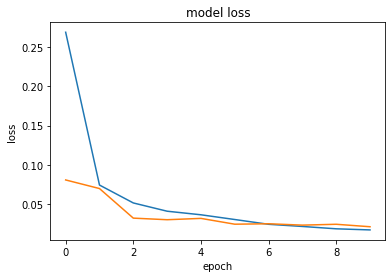

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


In [ ]:
model.evaluate(test_data,test_label)

313/313 [==============================] - 4s 11ms/step - loss: 0.0172 - accuracy: 0.9948


[0.01717405393719673, 0.9947999715805054]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
predictions = model.predict(test_data)
test_label=np.argmax(test_label, axis=1)
print(classification_report(test_label, np.argmax(predictions, axis=1))) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

